- 2021.07.06 u.k. feautrier's method, direct/formal

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np

#%matplotlib inline
#%matplotlib qt
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm

In [3]:
%load_ext autoreload
%autoreload 2

from spectra_src.ImportAll import *
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

In [4]:
from spectra_src.Experimental import ExFeautrier as Feautrier

---

In [7]:
from spectra_src.Math import GaussLeg 
GaussLeg.gauss_quad_coe_(0.,1.,4)

(array([0.06943184, 0.33000948, 0.66999052, 0.93056816]),
 array([0.17392742, 0.32607258, 0.32607258, 0.17392742]))

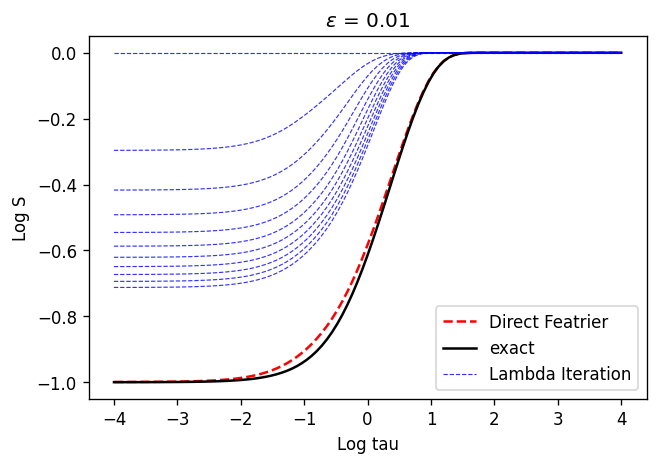

In [27]:
ND = 101
tau = np.logspace(-4,+4,ND)

I_upper = np.zeros(4,dtype=np.double)
a, b = 1, 0
B = a + b*tau
eps = np.ones(ND, dtype=np.double) * 1E-2

mus = np.array([0.06943184,  0.33000948,  0.66999052,  0.93056816],dtype=np.double)
ws = np.array([0.17392742,  0.32607258,  0.32607258,  0.17392742],dtype=np.double)

# diffusion limit
I_lower = B[-1] + mus * b

J_exact = a + b*tau + ( (b-np.sqrt(3)*a)/np.sqrt(3)/(1+np.sqrt(eps)) ) * np.exp(-np.sqrt(3*eps)*tau)
S_exact = (1-eps)*J_exact + eps*B
S_feautrier = Feautrier.direct_feautrier_(tau, I_upper, I_lower, B, eps)

fig,ax = plt.subplots(1,1, figsize=(6,4),dpi=120)

ax.plot(np.log10(tau), np.log10(S_feautrier), "r--", label="Direct Featrier")
ax.plot(np.log10(tau), np.log10(S_exact), "k", label="exact")
ax.set_ylabel("Log S")
ax.set_xlabel("Log tau")
ax.set_title("$\epsilon$ = {}".format(eps[0]))
ax.legend(loc="best")

#-- LI
S_LI = B.copy()
Tavg, BC = Feautrier.angle_averaged_tmat_(Feautrier.tmat_improved_RH_, tau, I_upper=I_upper, r0=0, rn=1)

for i in range(10):
    ax.plot(np.log10(tau), np.log10(S_LI), "--b", alpha=0.8, linewidth=0.7)
    J = Tavg @ S_LI + BC
    S_LI[:] = (1-eps)* J + eps*B
ax.plot(np.log10(tau), np.log10(S_LI), "--b", alpha=0.8, linewidth=0.7, label="Lambda Iteration")
ax.legend(loc="best")

plt.show()

plt.show()